In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

import seaborn as sns
%matplotlib inline

In [2]:
base_dir = "./"

In [3]:
dict_run_auc_diff = {}
dict_run_mse_diff = {}
for cur_run in np.arange(1,4):
    print("cur_run: ",cur_run)
    fname_auc_diff = base_dir+"run_"+str(cur_run)+"/diff_auc.csv"
    fname_mse_diff = base_dir+"run_"+str(cur_run)+"/diff_mse.csv"
    print("fname_auc_diff: ",fname_auc_diff)
    print("fname_mse_diff: ",fname_mse_diff)
    df_auc_diff = pd.read_csv(fname_auc_diff)
    df_auc_diff.columns = ['Dataset', 'dfmf', 'dcmf', 'cmf', 'gcmf']
    df_mse_diff = pd.read_csv(fname_mse_diff)
    df_mse_diff.columns = ['Dataset', 'dfmf', 'dcmf', 'cmf', 'gcmf']
    df_auc_diff.set_index("Dataset",inplace=True)
    df_mse_diff.set_index("Dataset",inplace=True)
    dict_run_auc_diff[cur_run] = df_auc_diff
    dict_run_mse_diff[cur_run] = df_mse_diff
    

cur_run:  1
fname_auc_diff:  ./run_1/diff_auc.csv
fname_mse_diff:  ./run_1/diff_mse.csv
cur_run:  2
fname_auc_diff:  ./run_2/diff_auc.csv
fname_mse_diff:  ./run_2/diff_mse.csv
cur_run:  3
fname_auc_diff:  ./run_3/diff_auc.csv
fname_mse_diff:  ./run_3/diff_mse.csv


In [4]:
# def get_mean_std(dict_run_auc_diff):
#     list_df = list(dict_run_auc_diff.values())
#     return p.mean(list_df), np.std(np.mean(list_df))

In [5]:
#mean
num_runs = 3
df_auc_diff_sum = None
for cur_run in np.arange(1,num_runs+1):
    if cur_run in [1]:
        df_auc_diff_sum = dict_run_auc_diff[cur_run]
    else:
        df_auc_diff_sum += dict_run_auc_diff[cur_run]
df_auc_diff_mean = df_auc_diff_sum/num_runs

In [6]:
dict_run_auc_diff

{1:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1      0.535141  0.384338  0.563164  0.542656
 ds1      0.582200  0.496222  0.593124  0.584680
 ds2      0.927013  0.614708  0.918278  0.916645
 ds3      0.980214  0.673777  0.984966  0.985221
 dn1      0.523714  0.423969  0.526326  0.502019
 dn2      0.562929  0.538518  0.553695  0.578833
 dn3      0.473280  0.402798  0.467443  0.452091,
 2:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1      0.232644  0.210303  0.235819  0.231414
 ds1      0.314851  0.339965  0.319857  0.316683
 ds2      0.241146  0.241401  0.249875  0.242826
 ds3      0.295648  0.291904  0.292058  0.299651
 dn1      0.126145  0.141069  0.133364  0.121453
 dn2      0.339452  0.353663  0.345052  0.344385
 dn3      0.255558  0.247517  0.249077  0.243974,
 3:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1     

In [7]:
dict_run_auc_diff_arr = {}
#
list_baselines = ["dfmf","dcmf","cmf","gcmf"]
list_datasets = ["dt1","ds1","ds2","ds3","dn1","dn2","dn3"]
#
for cur_run in dict_run_auc_diff.keys():
    cur_df = dict_run_auc_diff[cur_run]
    dict_run_auc_diff_arr[cur_run] = cur_df.to_numpy()    

In [8]:
dict_run_auc_diff_arr

{1: array([[0.53514103, 0.38433773, 0.56316367, 0.54265596],
        [0.58220035, 0.49622214, 0.5931237 , 0.58468044],
        [0.92701312, 0.61470763, 0.91827771, 0.9166452 ],
        [0.98021393, 0.67377747, 0.98496592, 0.98522087],
        [0.5237144 , 0.42396851, 0.52632622, 0.502019  ],
        [0.56292891, 0.53851797, 0.55369476, 0.57883301],
        [0.47327967, 0.40279785, 0.46744328, 0.45209051]]),
 2: array([[0.23264409, 0.21030348, 0.23581897, 0.23141369],
        [0.31485061, 0.33996478, 0.31985732, 0.31668316],
        [0.24114641, 0.24140123, 0.24987537, 0.24282617],
        [0.29564848, 0.29190446, 0.29205758, 0.29965134],
        [0.12614528, 0.14106923, 0.13336368, 0.12145328],
        [0.33945163, 0.35366344, 0.34505206, 0.34438469],
        [0.2555581 , 0.24751713, 0.24907673, 0.24397442]]),
 3: array([[0.18248732, 0.16229913, 0.20270131, 0.17920754],
        [0.11702455, 0.12764996, 0.11721378, 0.1130051 ],
        [0.30756391, 0.30557976, 0.30141929, 0.29962255],
 

In [9]:
dict_ij_val_list = {}
for cur_run in dict_run_auc_diff.keys():
    for i in np.arange(len(list_datasets)):
        for j in np.arange(len(list_baselines)):
            dict_ij_val_list[(i,j)] = []

In [10]:
for cur_run in dict_run_auc_diff.keys():
    cur_arr = dict_run_auc_diff_arr[cur_run]
    for i in np.arange(len(list_datasets)):
        for j in np.arange(len(list_baselines)):
            dict_ij_val_list[(i,j)].append(cur_arr[i,j])

In [11]:
dict_ij_sd = {}
for i in np.arange(len(list_datasets)):
    for j in np.arange(len(list_baselines)):
        dict_ij_sd[(i,j)] = np.std(dict_ij_val_list[(i,j)])

In [12]:
dict_ij_val_list[(0,0)]

[0.5351410306507687, 0.2326440851063829, 0.1824873197983512]

In [13]:
dict_ij_sd

{(0, 0): 0.15577217799930645,
 (0, 1): 0.09539012069482877,
 (0, 2): 0.16268047878902517,
 (0, 3): 0.16044797968958607,
 (1, 0): 0.19061292010905415,
 (1, 1): 0.1510479680772421,
 (1, 2): 0.19500118852324788,
 (1, 3): 0.19315650255375683,
 (2, 0): 0.3088584255805539,
 (2, 1): 0.16297122910825732,
 (2, 2): 0.3036688191195067,
 (2, 3): 0.3051365588526092,
 (3, 0): 0.3176062258658719,
 (3, 1): 0.18042103218089897,
 (3, 2): 0.3199059173751534,
 (3, 3): 0.319513211959809,
 (4, 0): 0.16594124713983058,
 (4, 1): 0.11649071360644281,
 (4, 2): 0.16483166973947386,
 (4, 3): 0.15790094693098058,
 (5, 0): 0.1621659226286316,
 (5, 1): 0.15798953201104873,
 (5, 2): 0.16394227441108092,
 (5, 3): 0.16682041556654637,
 (6, 0): 0.13499360694298004,
 (6, 1): 0.10778261150182052,
 (6, 2): 0.13464871852758997,
 (6, 3): 0.12963930943262045}

In [14]:
#back to --> arr --> df
sd_arr = np.zeros((len(list_datasets),len(list_baselines)))
for i in np.arange(len(list_datasets)):
    for j in np.arange(len(list_baselines)):
        sd_arr[i,j] = dict_ij_sd[(i,j)]

In [15]:
df_auc_diff_std = pd.DataFrame(sd_arr)
df_auc_diff_std.columns = list_baselines
df_auc_diff_std.index = list_datasets

In [16]:
df_auc_diff_std

,dfmf,dcmf,cmf,gcmf
dt1,0.155772,0.095390,0.162680,0.160448
ds1,0.190613,0.151048,0.195001,0.193157
ds2,0.308858,0.162971,0.303669,0.305137
ds3,0.317606,0.180421,0.319906,0.319513
dn1,0.165941,0.116491,0.164832,0.157901
dn2,0.162166,0.157990,0.163942,0.166820
dn3,0.134994,0.107783,0.134649,0.129639


In [17]:
#

In [18]:
dict_run_mse_diff

{1:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1     -0.019865 -0.030460 -0.043905 -0.115279
 ds1     -0.070353 -0.017558 -0.063803 -0.091634
 ds2     -0.062957 -0.023689 -0.066876 -0.116849
 ds3     -0.048188  0.013685 -0.107880 -0.125528
 dn1     -0.058296  0.006300 -0.147409 -0.189530
 dn2     -0.053982 -0.006997 -0.104386 -0.163508
 dn3     -0.032962 -0.018680 -0.081274 -0.145046,
 2:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1      0.028264 -0.047066  0.002551 -0.074336
 ds1     -0.056274 -0.075530 -0.025507 -0.066700
 ds2     -0.027072 -0.050911 -0.039400 -0.077273
 ds3      0.002744 -0.036821 -0.088015 -0.093470
 dn1      0.009617 -0.083058 -0.053956 -0.115979
 dn2      0.029236 -0.044011 -0.023198 -0.077070
 dn3      0.033694 -0.049781 -0.011536 -0.082264,
 3:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1     

In [19]:
# df_mse_diff_mean, df_mse_diff_std = get_mean_std(dict_run_mse_diff)

In [20]:
# df_mse_diff_mean

In [21]:
# df_mse_diff_std

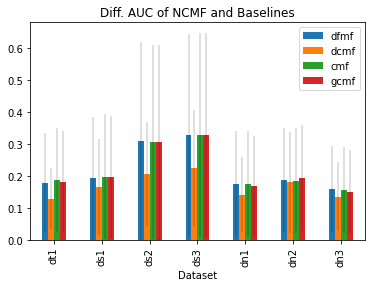

In [22]:
fig = df_auc_diff_mean.plot.bar(title="Diff. AUC of NCMF and Baselines",yerr=df_auc_diff_std,error_kw=dict(ls="--", lw=.25)).get_figure()
#fig = df_auc_diff_mean.plot.bar(title="Diff. AUC of NCMF and Baselines").get_figure()
fig.savefig('auc_diff_err_bar.pdf', bbox_inches='tight')
fig.savefig('auc_diff_err_bar.png', bbox_inches='tight')


In [23]:
# fig2 = df_mse_diff_mean.plot.bar(title="Diff. MSE of NCMF and Baselines",yerr=df_mse_diff_std,error_kw=dict(ls="--", lw=0.25)).get_figure()
# #fig2 = df_mse_diff_mean.plot.bar(title="Diff. MSE of NCMF and Baselines").get_figure()
# fig2.savefig('mse_diff_err_bar.pdf', bbox_inches='tight')
# fig2.savefig('mse_diff_err_bar.png', bbox_inches='tight')